In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading file

In [2]:
df = pd.read_csv('../../data/data_initial_preprocessing.csv')
df.shape

(843915, 12)

### Check how many row each station has

In [3]:
stations = df.copy()
stations.drop_duplicates(subset=['station_id'], inplace=True)
stations.shape

(667, 12)

In [4]:
df.head()

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error
0,SN18700,59.9423,10.7200,2019,5,13,12,12.47900,11.2500,11.1,0,0.1500
1,SN80740,66.9035,13.6460,2019,5,13,12,4.09424,6.1500,6.0,0,0.1500
2,SN61630,62.2583,8.2000,2019,5,13,12,1.81200,4.4500,4.3,0,0.1500
3,SN8140,61.4255,11.0803,2019,5,13,12,8.86768,9.6500,9.5,0,0.1500
4,SN23500,61.1220,9.0630,2019,5,13,12,7.61084,9.6586,8.6,0,1.0586


In [5]:
stations_dict = stations[['station_id']].reset_index(drop=True).to_dict()['station_id']
new_dict = dict([(value, key) for key, value in stations_dict.items()])
df['node'] = df.station_id.apply(lambda x: new_dict[x])

In [25]:
df[df['station_id']=='SN86740']

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error,node
632,SN86740,68.6072,14.4347,2019,5,13,12,5.76123,5.86862,6.0,0,0.13138,632
1261,SN86740,68.6072,14.4347,2019,5,13,6,4.82690,4.93970,5.0,0,0.06030,632
1886,SN86740,68.6072,14.4347,2019,5,13,0,3.61084,3.68567,3.8,0,0.11433,632
2516,SN86740,68.6072,14.4347,2019,5,12,18,2.95215,3.56620,2.8,0,0.76620,632
3149,SN86740,68.6072,14.4347,2019,5,12,12,3.58130,3.77094,4.2,0,0.42906,632
...,...,...,...,...,...,...,...,...,...,...,...,...,...
841370,SN86740,68.6072,14.4347,2019,5,14,18,5.10156,5.07070,5.3,0,0.22930,632
842002,SN86740,68.6072,14.4347,2019,5,14,12,5.50195,5.49050,5.6,0,0.10950,632
842639,SN86740,68.6072,14.4347,2019,5,14,6,4.81372,5.33136,5.1,0,0.23136,632
843276,SN86740,68.6072,14.4347,2019,5,14,0,4.53930,5.16770,4.4,0,0.76770,632


In [6]:
missing_analysis = df.groupby(['node']).count()['station_id'].copy()
missing_analysis

node
0      1392
1      1392
2      1381
3      1387
4      1383
       ... 
662      37
663     223
664     469
665      74
666       1
Name: station_id, Length: 667, dtype: int64

In [7]:
threshold = missing_analysis.max()*0.9

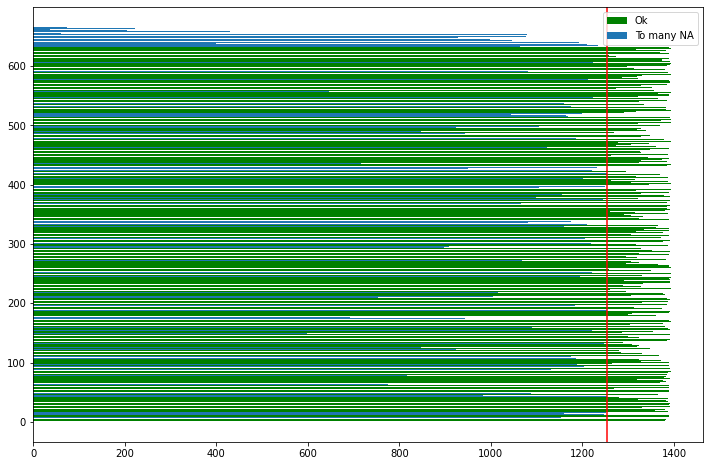

In [8]:
plt.figure(figsize=(12,8))
plt.barh(missing_analysis[missing_analysis > threshold].index, missing_analysis[missing_analysis > threshold], color='green', label='Ok')
plt.barh(missing_analysis[missing_analysis < threshold].index, missing_analysis[missing_analysis < threshold], label='To many NA')
plt.axvline(threshold, color='red')
plt.legend()
plt.show()

In [9]:
print(f'{round(missing_analysis[missing_analysis > threshold].shape[0]/missing_analysis.shape[0], 4)*100}% of data has less than 10% missing values')

76.01% of data has less than 10% missing values


### What stations had > 10% NA?

In [10]:
import gridpp
import netCDF4
import pyproj
import matplotlib.pylab as plt_lab

filename =  'https://thredds.met.no/thredds/dodsC/meps25epsarchive/2020/01/30/meps_subset_2_5km_20200130T18Z.nc'
file = netCDF4.Dataset(filename)

In [11]:
latitudes = file.variables["latitude"][:]
longitudes = file.variables["longitude"][:]
timestep = 0
temperature = file.variables["air_temperature_2m"][timestep,0, 0, :, :]

In [12]:
stations['number_of_observations'] = missing_analysis
stations

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error,number_of_observations
0,SN18700,59.94230,10.72000,2019,5,13,12,12.479000,11.25000,11.1,0,0.15000,1392.0
1,SN80740,66.90350,13.64600,2019,5,13,12,4.094240,6.15000,6.0,0,0.15000,1392.0
2,SN61630,62.25830,8.20000,2019,5,13,12,1.812000,4.45000,4.3,0,0.15000,1381.0
3,SN8140,61.42550,11.08030,2019,5,13,12,8.867680,9.65000,9.5,0,0.15000,1387.0
4,SN23500,61.12200,9.06300,2019,5,13,12,7.610840,9.65860,8.6,0,1.05860,1383.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324578,SN30244,59.07270,9.92300,2019,10,29,18,0.979500,2.56567,0.7,0,1.86567,NaN
325893,SN25541,60.68108,8.00375,2019,10,29,0,-6.306150,-3.95193,-4.5,0,0.54807,NaN
388852,SN54815,61.27470,8.13850,2019,11,30,18,-8.348236,-7.62027,-8.0,0,0.37973,NaN
556356,SN30428,59.18550,9.54030,2019,1,22,6,-8.286380,-5.60867,-6.0,0,0.39133,NaN


In [13]:
stations['node'] = stations.station_id.apply(lambda x: new_dict[x])

In [14]:
stations_na = stations[stations['number_of_observations'] < threshold]
lats = stations_na.lat
longs = stations_na.long

In [15]:
stations_na

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error,number_of_observations,node
6,SN50245,60.3643,5.6942,2019,5,13,12,10.89893,12.18448,9.5,0,2.68448,1211.0,6
7,SN52452,60.5225,5.2670,2019,5,13,12,9.94190,9.87100,8.2,0,1.67100,1154.0,7
12,SN53280,60.8610,7.1048,2019,5,13,12,6.32568,11.04813,10.8,0,0.24813,1248.0,12
14,SN54330,61.0795,7.8478,2019,5,13,12,4.08447,7.79346,7.3,0,0.49346,1160.0,14
15,SN26840,59.7658,10.0123,2019,5,13,12,12.12842,13.58548,11.1,0,2.48548,800.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,SN34100,58.9732,9.5368,2019,5,13,12,12.31494,13.84490,11.7,0,2.14490,714.0,590
591,SN80870,67.0837,14.2075,2019,5,13,12,3.05615,6.56780,4.3,0,2.26780,1081.0,591
606,SN62950,62.9712,7.7793,2019,5,13,12,7.68800,7.52963,7.0,0,0.52963,1222.0,606
620,SN47055,59.2955,5.4890,2019,5,13,12,11.40870,12.12595,10.7,0,1.42595,718.0,620


### Stations with > 10% NA

/tmp/ipykernel_8092/2596667968.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt_lab.pcolormesh(longitudes, latitudes, temperature)


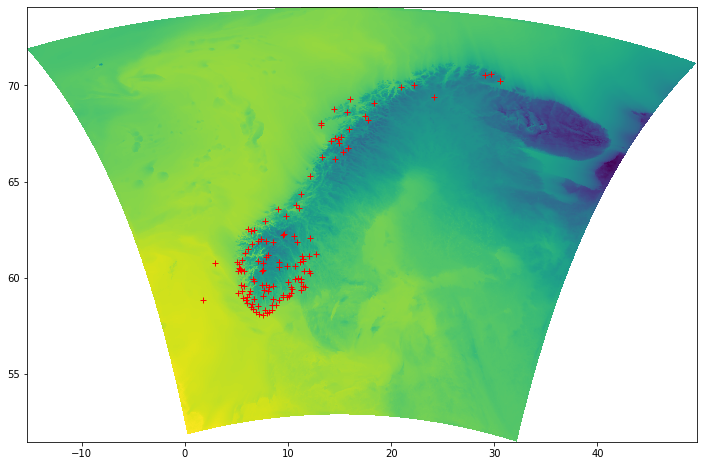

In [16]:
plt_lab.figure(figsize=(12,8))
plt_lab.pcolormesh(longitudes, latitudes, temperature)
for i in stations_na.index:
    plt_lab.plot(longs[i], lats[i] , 'r+')

plt_lab.show()

In [17]:
valid_stations = stations[stations['number_of_observations'] > threshold]
valid_lats = valid_stations.lat
valid_longs = valid_stations.long

### Stations whit < 10% NA

/tmp/ipykernel_8092/3881254175.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt_lab.pcolormesh(longitudes, latitudes, temperature)


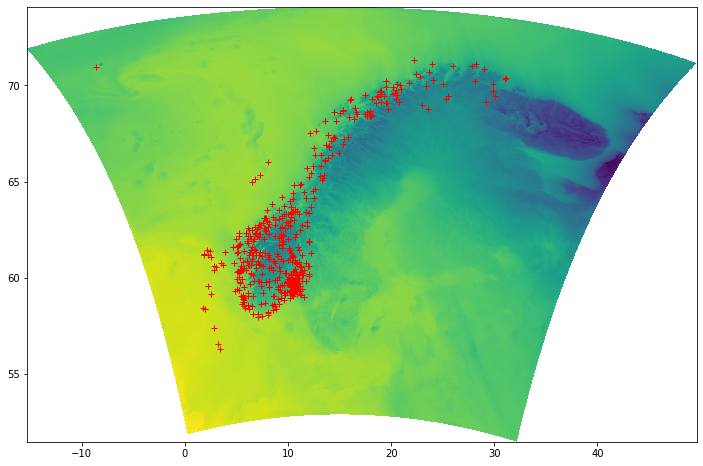

In [18]:
plt_lab.figure(figsize=(12,8))
plt_lab.pcolormesh(longitudes, latitudes, temperature)
for i in valid_stations.index:
    plt_lab.plot(valid_longs[i], valid_lats[i] , 'r+')

plt_lab.show()

In [19]:
valid_stations[valid_stations['lat'] == valid_stations['lat'].min()]

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error,number_of_observations,node
418,SN76939,56.2782,3.3928,2019,5,13,12,8.44873,8.3632,12.5,0,4.1368,1344.0,418


In [20]:
valid_stations

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error,number_of_observations,node
0,SN18700,59.9423,10.7200,2019,5,13,12,12.47900,11.25000,11.1,0,0.15000,1392.0,0
1,SN80740,66.9035,13.6460,2019,5,13,12,4.09424,6.15000,6.0,0,0.15000,1392.0,1
2,SN61630,62.2583,8.2000,2019,5,13,12,1.81200,4.45000,4.3,0,0.15000,1381.0,2
3,SN8140,61.4255,11.0803,2019,5,13,12,8.86768,9.65000,9.5,0,0.15000,1387.0,3
4,SN23500,61.1220,9.0630,2019,5,13,12,7.61084,9.65860,8.6,0,1.05860,1383.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,SN61580,62.2943,8.1255,2019,5,13,12,2.43604,5.00507,5.4,0,0.39493,1318.0,628
629,SN24670,60.2684,9.6919,2019,5,13,12,10.29736,11.67703,10.6,0,1.07703,1317.0,629
630,SN90490,69.6767,18.9133,2019,5,13,12,4.74950,4.65000,4.5,0,0.15000,1393.0,630
631,SN77490,65.3143,13.4483,2019,5,13,12,-0.27880,-1.67065,-2.6,0,0.92935,1388.0,631


In [21]:
valid_stations.reset_index(drop=True, inplace=True)
valid_stations.drop(['node'], axis=1, inplace=True)
valid_stations

/home/gustavoaraujo/Documentos/mestrado/tese/github/msc_postprocessing_weather/venv/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error,number_of_observations
0,SN18700,59.9423,10.7200,2019,5,13,12,12.47900,11.25000,11.1,0,0.15000,1392.0
1,SN80740,66.9035,13.6460,2019,5,13,12,4.09424,6.15000,6.0,0,0.15000,1392.0
2,SN61630,62.2583,8.2000,2019,5,13,12,1.81200,4.45000,4.3,0,0.15000,1381.0
3,SN8140,61.4255,11.0803,2019,5,13,12,8.86768,9.65000,9.5,0,0.15000,1387.0
4,SN23500,61.1220,9.0630,2019,5,13,12,7.61084,9.65860,8.6,0,1.05860,1383.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,SN61580,62.2943,8.1255,2019,5,13,12,2.43604,5.00507,5.4,0,0.39493,1318.0
501,SN24670,60.2684,9.6919,2019,5,13,12,10.29736,11.67703,10.6,0,1.07703,1317.0
502,SN90490,69.6767,18.9133,2019,5,13,12,4.74950,4.65000,4.5,0,0.15000,1393.0
503,SN77490,65.3143,13.4483,2019,5,13,12,-0.27880,-1.67065,-2.6,0,0.92935,1388.0


In [22]:
valid_stations.to_csv('without_na_sations.csv', index=False)